# Диод для молекул в виде клапанной структуры на торце нанотрубки

В работе "Синтетический «демон» Максвелла", опубликованной в журнале «Химия и жизнь», 2001, №12 (http://daju.narod.ru/Maxwell/SintMaxwDem.htm) мною была сформулирована следующая идея: "для реализации идеи Максвелла ... нужно создать такую молекулярную систему, в которой пространственные затруднения для теплового движения молекул рабочей жидкости в одном направлении были бы меньшими, чем в противоположном."

Данную идею я пытался реализовать в следующих работах: 

- "Жидкокристаллический двигатель или акустомеханический преобразователь", 4-6 января 2010 г – 17 июля 2010 г., http://liquidcrystalosmos.narod.ru/liquidcrystalengine.htm

- Жидкокристаллический осмос или о возможности нарушения принципа детального равновесия в жидкокристаллической дисклинации, 17.11.2010, http://liquidcrystalosmos.narod.ru/liquidcrystalosmos.htm

- Жидкокристаллический осмос или о возможности нарушения принципа детального равновесия в жидкокристаллической дисклинации, переработанный и исправленный вариант, Dec 15, 2022,  https://nbviewer.org/github/daju1/articles/blob/master/liquidcrystalosmos/liquidcrystalosmos.ipynb

- Геометрический диод для молекул, https://nbviewer.org/github/daju1/articles/blob/master/diode_for_molecules/diode_for_molecules.ipynb

Для конфигурации клапанной структуры внутри нанотрубки был выполнен расчёт методом молекулярной динамики. За основу молекулярной модели была взята

https://github.com/daju1/moldyn/blob/main/nanotube_12_membrane_4_tricyanomethyl/

На всех осях были заданы периодические граничные условия. Это значит, что если атом вылетел за пределы границы расчётной ячейки, то считается что он залетел с той же скоростью но с противоположной стороны.


исходные коды программы ghemical, которую я использую для МД моделирования, взяты отсюда
https://www.bioinformatics.org/ghemical/download/release20111012/

Но в целях проведения эксперимента данные коды были модифицированы набором патчей

https://github.com/daju1/winlibghemical/tree/master/linux/release20111012

который в среде докер 

https://github.com/daju1/winlibghemical/tree/master/linux/release20111012/docker

собираются следующим набором комманд

	make download
	make getcodes
	make all

Был разработаны также и рабочий пример для запуска моделирования из консольной программы без визуального интерфейса

https://github.com/daju1/winlibghemical/blob/master/linux/release20111012/examples/example_moldyn.cpp

А непосредственно для запуска моделирования использовался скрипт на основе

https://github.com/daju1/winlibghemical/blob/master/linux/release20111012/examples/moldyn_nanotube12_cyanoform4.sh

В алгоритм программы МД закладываются потенциалы взаимодействия атомов друг с другом, в частности

https://ru.wikipedia.org/wiki/Потенциал_Леннард-Джонса

В программе, которую использовал я, используется

http://open-babel.readthedocs.io/en/latest/Forcefields/ghemical.html


# опции алгоритма МД

B0, B1, B2 в названии файла означает режим оптимизации размера бокса во время процесса МД

B0 - отсутствует оптимизация размера бокса вообще

B1 - оптимизация размера бокса включена постоянно. Этот режим также был включён по умолчанию ранее в предыдущих моделированиях а также в файлах тракторий с отсутствующей буквой B

B2 - только лишь в процессе нагревания и уравновешивания

	enum box_optimization_moldyn_mode
	{
		box_optimization_no = 0,
		box_optimization_always,
		box_optimization_equilibration, // box_optimization just during heating and equilibration
	};

E - алгоритм термостата выключен, моделирование при постоянной энергии

I - инверсия скоростей инициализации начальных скоростей атомов


# Моделирование клапанной структуры на торце нанотрубки

Предварительные исследования данной модели были произведены в работе

Моделирование барьера диффузии инертного газа через клапаннную структуру на торце нанотрубки

Модель нанотрубки (12.0) с клапанной структурой из четырех цианоформных групп на её торце

https://github.com/daju1/moldyn/blob/main/valve_gate_nanotube_12_0_4cyanoforms.pdf

Был сделан следующий вывод:

<p><i>моделирование при фиксировании у пробного атома только лишь z координаты показало, что 

потенциальная энергия деформации мембранной молекулярной системы Epot 12.5 кДж/моль в прямом направлении и 19.5 кДж/моль в обратном направлении

работа проталкивания пробного атома сквозь мембрану prob\_atom\_fz\_integral 14.235 кДж/моль в прямом направлении и 23.384 кДж/моль в обратном направлении (при числе итераций оптимизации 500)

В той молекулярной модели величина барьера по порядкувеличины соответствует величине средней энергии поступательного движения молекул 1/2*R * T = 0,5 * 8.314 * 300/1000 = 1.247 кДж / моль.</i></p>

Для данного моделирования была построена молекулярная система мембраны с порой в виде нанотрубки на торец которой присоединены 4 цианоформных радикала

https://github.com/daju1/moldyn/tree/main/nanotube_12_membrane_4_tricyanomethyl

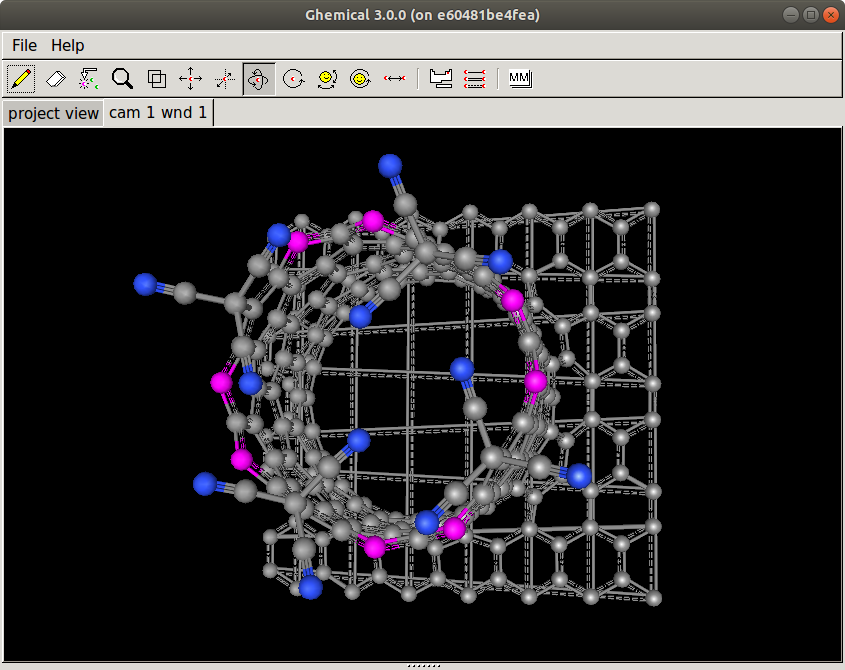

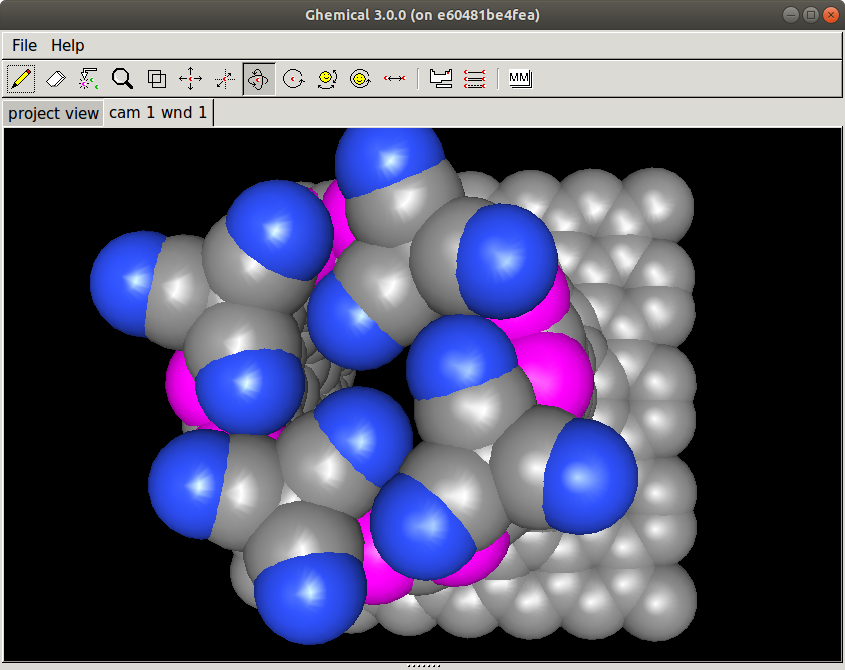

Периодическая ячейка с такой клапанной структурой заполнена молекулами кислорода

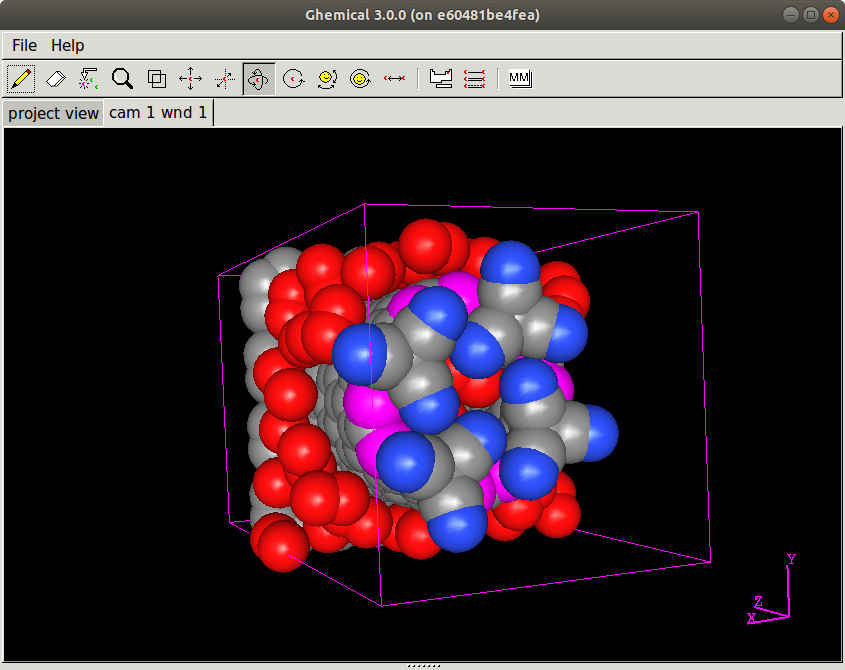

Для презентации результатов моделирования использую следующие функции

# Функция расчёта мощности процесса

In [1]:
def calc_power_old(data, this_is_a_gas):
    global header
    global boundary

    import numpy as np

    data_len = len(data[0])
 
    start_from = int(0.9 * data_len)
    i_cumulative_mean_velocity_m_s = 21
    i_cumulative_mean_force        = 22
    i_coordinate_cumsum_acceleration = 19
    data_cumulative_mean_velocity_m_s   = data[i_cumulative_mean_velocity_m_s  ][start_from:]
    data_cumulative_mean_force          = data[i_cumulative_mean_force         ][start_from:]
    data_coordinate_cumsum_acceleration = data[i_coordinate_cumsum_acceleration][:]
    
    cumulative_mean_velocity_m_s =  np.mean(data_cumulative_mean_velocity_m_s)
    # внутрипрограмный параметр "сила" (eng->d1) противонаправлен ускорению.
    # Поэтому действительная сила имеет противоположный знак внутрипрограммному параметру "сила"
    cumulative_mean_force        = -np.mean(data_cumulative_mean_force)

    print(header[i_cumulative_mean_velocity_m_s], cumulative_mean_velocity_m_s)
    print(header[i_cumulative_mean_force       ], cumulative_mean_force)

    # площадь ячейки в плоскости xy в кв.м
    s_m_2 = 4*boundary[0]*boundary[1]*(10^-9)^2

    # коэффициент перевода внутрипрограммных единиц измерения давления в Паскали
    p_ed_izm_Pa_per_atom_ = F_ed_izm_Newton_per_atom / s_m_2

    p_os = cumulative_mean_force * p_ed_izm_Pa_per_atom_
    print("p_os, Pascal                      =", p_os)
    V_os = cumulative_mean_velocity_m_s
    print("V_os, m/s                         =", V_os)

    print("coordinate_cumsum_acceleration (nm)", data_coordinate_cumsum_acceleration[data_len-1] - data_coordinate_cumsum_acceleration[0])

    if (this_is_a_gas):
        power = 0.5 * p_os * V_os
        print("power, Watt/m^2              =", power)

In [2]:
def linterp_data(data, j, kx, ky, start_from = 0):
    import numpy as np
    y = data[j][start_from:]
    x = data[0][start_from:]

    t = []
    for i in range(len(x)):
        t += [x[i] * kx]
    A = np.vstack([t, np.ones(len(x))]).T

    
    v = []
    for i in range(len(y)):
        v += [y[i] * ky]

    m, c = np.linalg.lstsq(A, v, rcond=None)[0]
    
    import matplotlib.pyplot as plt
    _ = plt.plot(t, v, 'o', label='Original data', markersize=2)
    _ = plt.plot([  t[0],       t[len(x)-1]    ],
                 [m*t[0] + c, m*t[len(x)-1] + c],
                 'r', label='Fitted line')
    _ = plt.legend()
    plt.show()
    
    return m, c

In [3]:
def calc_power(data_g, data_m, start_from):
    # с помощью линейной интерполяции параметра
    # {"coordinate_cumsum_velocity_and_acceleration","nm"}
    # рассчитаем скорость установившегося дрейфа в м/сек

    kx = time_step_between_traj_records # s
    ky = 1e-9                           # nm --> m

    v_g, _ = linterp_data(data_g, j = 20, kx = kx, ky = ky, start_from = start_from)

    v_m, _ = linterp_data(data_m, j = 20, kx = kx, ky = ky, start_from = start_from)
    print("V_gas, m/s                    =", v_g)
    print("V_membrane, m/s               =", v_m)
    
    # площадь ячейки в плоскости xy в кв.м
    s_m_2 = 4*boundary[0]*boundary[1]*(10^-9)^2

    # коэффициент перевода внутрипрограммных единиц измерения давления в Паскали
    p_ed_izm_Pa_per_atom_ = F_ed_izm_Newton_per_atom / s_m_2

    # с помощью линейной интерполяции параметра
    # {"cumsum_force",""}
    # рассчитаем установившееся давление в Па
    # как линеаризованная скорость прироста случайной величины
    # кумулятивная сумма силы приложенной к атомам газа

    kx = traj_frame_save_frq
    ky = p_ed_izm_Pa_per_atom_

    p_g, _ = linterp_data(data_g, j = 11, kx = kx, ky = ky, start_from = start_from)
    p_m, _ = linterp_data(data_m, j = 11, kx = kx, ky = ky, start_from = start_from)
    print("p_gas, Pascal                 =", -p_g)
    print("p_membrane, Pascal            =", -p_m)

    # внутрипрограмный параметр "сила" (eng->d1) противонаправлен ускорению.
    # Поэтому действительная сила приложенная к атомам газа 
    # имеет противоположный знак внутрипрограммному параметру "сила"

    # Поэтому при расчёте удельной мощности приложенной к атомам газа 
    # умножаем давление приложенное к атомам газа на на скорость атомов газа относительно мембраны 

    power_g = -p_g * (v_g - v_m)
    print("power applied to gas,      Watt/m^2              =", power_g)
    
    # при расчёте удельной мощности приложенной к мембране 
    # умножаем давление приложенное к мембране на на скорость мембраны 

    power_m = -p_m * v_m
    print("power applied to membrane, Watt/m^2              =", power_g)   

# Функция загрузки данных моделирования из файла

In [4]:
def fill_data_from_file(fn, print_header = False):
    global header
    data = []
    global boundary
    global time_step_between_traj_records
    global traj_frame_save_frq
    global traj_tstep1
    with open(fn) as file:
        while line := file.readline():
            if line.__contains__("the trajectory real_frames"):
                print(line)
            if line.__contains__("the trajectory common time is"):
                print(line)
            if line.__contains__("time step between traj records"):
                time_step_between_traj_records = 1
                print(line)
                time_step_between_traj_records_string = line.strip("time step between traj records").strip("s\n")
                for s in time_step_between_traj_records_string.split("*"):
                    time_step_between_traj_records *= float(s)
            if line.__contains__("traj_frame_save_frq"):
                # "PrintToLog: traj_frame_save_frq 1000 traj_tstep1 2"
                lst = line.split(" ")
                if len(lst) == 5 and lst[1] == 'traj_frame_save_frq':
                    traj_frame_save_frq = float(lst[2])
                    traj_tstep1         = float(lst[4])
                print(line)
            lst = line.split(",")
            if len(lst) < 3:
                lst = line.split(" ")
                if len(lst) == 4 and lst[0] == 'boundary':
                    boundary[0] = float(lst[1])
                    boundary[1] = float(lst[2])
                    boundary[2] = float(lst[3])
                    print ("boundary", boundary)
                continue

            if (None == header):
                header = lst
                header_len = len(header)
                if print_header:
                    print(header)
                for i in range(header_len):
                    data += [[]]
            else:
                for i in range(header_len):
                    value = float(lst[i])
                    data[i] += [value]
    return data

универсальная газовая постоянная = 8.31446262 $Дж\, К^{-1} Моль^{-1}$

$N_A$ ≡ 6,022 140 76 10^23 $моль^{−1}$

In [5]:
R          = 8.31446262
N_Avogadro = 6.02214076 * 10^23
T          = 300

Анализируя внутрипрограммные формулы можно заметить, что второй закон Ньютона записан в виде $F = -\,m \cdot a$. Подставляя использованные в программе единицы измерения

$[F] = [kg/mol] \cdot [1.0e+12\,m/s^2]$

$[F] = [1.0e+12\,Newton/mol]$

$[F] = [1.66053906717385e-12\,Newton/atom]$

Коеффициент перевода единиц силы из внутрипрограмных единиц в Ньютон на атом

In [6]:
# коэффициент перевода внутрипрограммных единиц измерения силы в Ньютоны на моль
F_ed_izm_Newton_per_mol  = 1.0e+12

# коэффициент перевода внутрипрограммных единиц измерения силы в Ньютоны на атом
F_ed_izm_Newton_per_atom = F_ed_izm_Newton_per_mol/N_Avogadro

In [7]:
boundary = [0, 0, 0]

In [8]:
time_step_between_traj_records = None
traj_frame_save_frq = None
traj_tstep1 = None

In [9]:
folder = "nanotube_12_membrane_4_tricyanomethyl"
fn = "12.0_4cyanoforms_O2_"
suffix = "B0_H_P"

# Результат моделирования B0, H P 300 K

результат моделирования со следующими опциями

- оптимизация размера бокса - нет (B0)
- функция термостата включена, термостат Nose-Hoover(H)
- инициализация начальных скоростей атомов производилась для температуры 300 К
- для моделирования при постоянном давлении используется функция баростата Берендсена (P)

In [10]:
header = None
data_g = fill_data_from_file(folder + "/" + fn + "." + suffix + ".traj.plots.dim2.gas.txt")
# calc_power_old(data_g, this_is_a_gas = True)

PrintToLog: the trajectory real_frames 69576 does not correspond to 2000000 frames. Will be reset

PrintToLog: traj_frame_save_frq 1000 traj_tstep1 2

time step between traj records 2 * 1.0E-12 s

the trajectory common time is 139.15 * 1.0E-9 s

boundary [0.852865, 0.847497, 1.496702]


In [11]:
header = None
data_m = fill_data_from_file(folder + "/" + fn + "." + suffix + ".traj.plots.dim2.membrane.txt")
# calc_power_old(data_m, this_is_a_gas = False)

PrintToLog: the trajectory real_frames 69576 does not correspond to 2000000 frames. Will be reset

PrintToLog: traj_frame_save_frq 1000 traj_tstep1 2

time step between traj records 2 * 1.0E-12 s

the trajectory common time is 139.15 * 1.0E-9 s

boundary [0.852865, 0.847497, 1.496702]


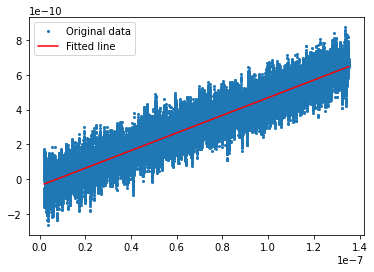

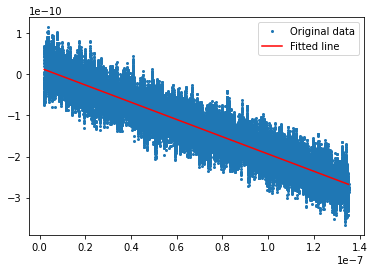

V_gas, m/s                    = 0.0050540526730026986
V_membrane, m/s               = -0.002099848478635728


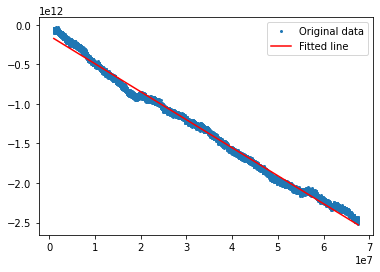

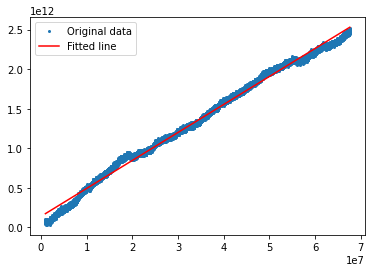

p_gas, Pascal                 = 35402.521442204394
p_membrane, Pascal            = -35402.521442204394
power applied to gas,      Watt/m^2              = 253.2661389162901
power applied to membrane, Watt/m^2              = 253.2661389162901


In [12]:
calc_power(data_g, data_m, start_from = 1000)

# Результат моделирования B0, H P 300 K, I

результат моделирования со следующими опциями

- оптимизация размера бокса - нет (B0)
- функция термостата включена, термостат Nose Hoover (H)
- инициализация начальных скоростей атомов производилась для температуры 300 К
- для моделирования при постоянном давлении используется функция баростата Берендсена (P)
- инверсия скоростей инициализации начальных скоростей атомов (I)

In [13]:
header = None
data_gi = fill_data_from_file(folder + "/" + fn + "." + suffix + "_I.traj.plots.dim2.gas.txt")
calc_power_old(data_g, this_is_a_gas = True)

PrintToLog: the trajectory real_frames 68489 does not correspond to 2000000 frames. Will be reset

PrintToLog: traj_frame_save_frq 1000 traj_tstep1 2

time step between traj records 2 * 1.0E-12 s

the trajectory common time is 136.976 * 1.0E-9 s

boundary [0.852721, 0.847355, 1.49645]
cumulative_mean_velocity(m/s) 0.004765490016277006
cumulative_mean_force 0.06365775313702278
p_os, Pascal                      = 36573.62916089245
V_os, m/s                         = 0.004765490016277006
coordinate_cumsum_acceleration (nm) 0.00691467
power, Watt/m^2              = 87.14563231262527


In [14]:
header = None
data_mi = fill_data_from_file(folder + "/" + fn + "." + suffix + "_I.traj.plots.dim2.membrane.txt")
calc_power_old(data_m, this_is_a_gas = False)

PrintToLog: the trajectory real_frames 68489 does not correspond to 2000000 frames. Will be reset

PrintToLog: traj_frame_save_frq 1000 traj_tstep1 2

time step between traj records 2 * 1.0E-12 s

the trajectory common time is 136.976 * 1.0E-9 s

boundary [0.852721, 0.847355, 1.49645]
cumulative_mean_velocity(m/s) -0.0019741954276413136
cumulative_mean_force -0.06365775313702278
p_os, Pascal                      = -36573.62916089245
V_os, m/s                         = -0.0019741954276413136
coordinate_cumsum_acceleration (nm) -0.00214635


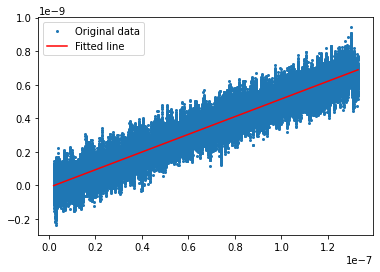

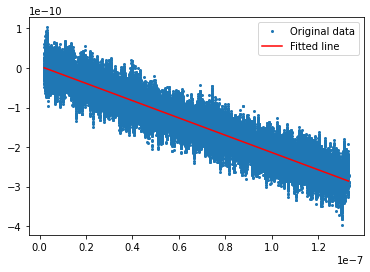

V_gas, m/s                    = 0.005266308933734051
V_membrane, m/s               = -0.0021872252383616326


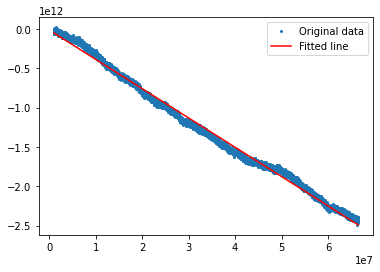

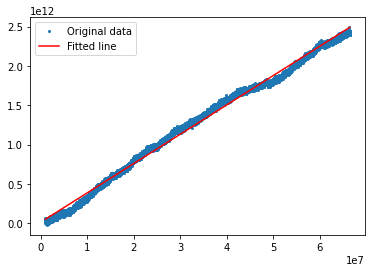

p_gas, Pascal                 = 37276.64859924101
p_membrane, Pascal            = -37276.64859924101
power applied to gas,      Watt/m^2              = 277.84277415564554
power applied to membrane, Watt/m^2              = 277.84277415564554


In [15]:
calc_power(data_gi, data_mi, start_from = 1000)

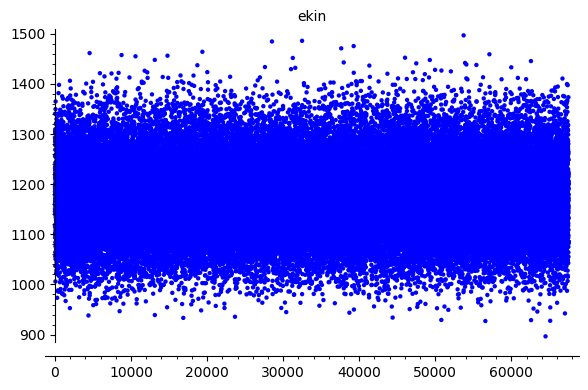

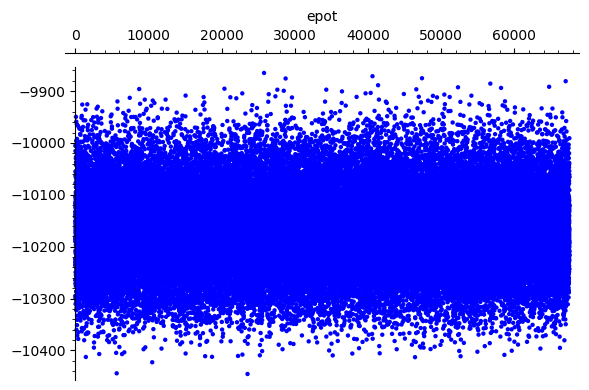

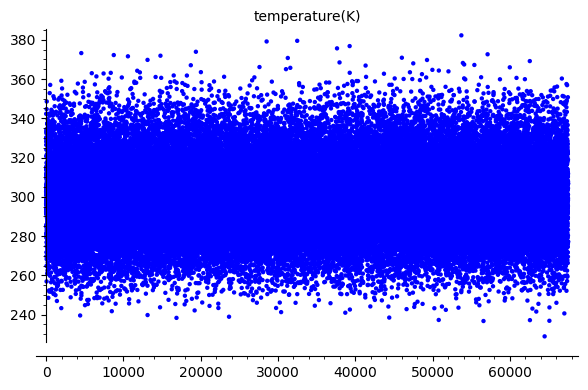

In [16]:
start_from = 50
for i in [23, 24, 25]:
    plt = list_plot(data_g[i][start_from:])
    plt.show(title=header[i])

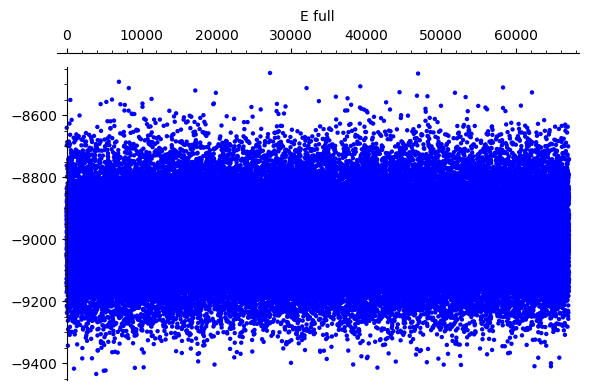

In [17]:
E_full = []
start_from = 500
for i in range (start_from,len(data_g[23])):
    E_full += [data_g[23][i]+data_g[24][i]]
plt = list_plot(E_full)
plt.show(title="E full")

# Предварительные выводы

Есть веские основания полагать, что важную роль в полученном результате сыграл такой параметр моделирования, как баростат Берендсена, действие которого похоже на действие длинноволновых тепловых фононов, упоминающихся в теории теплоемкости. С учетом того, что размер ячейки моделирования много меньше реального размера исследуемой системы, содержащей фононы теплоемкости, по сути баростат Берендсена выполнял роль флуктуаций плотности под действием длинноволновых тепловых фононов

# Вывод формул для коэффициента направленного самопроизвольного осмоса

по аналогии с формулами Эйнштейна и Green Kubo для коэффициента диффузии

можно дать определение для коэффициента направленного самопроизвольного осмоса, который наблюдается в данном  моделировании мембраны с клапанной структуры на торце нанотрубки по меньшей мере с использованием баростата Берендсена


по аналогии с формулой Эйнштейна для коэффициента диффузии

$$\lim\limits_{t \to \infty} \left(r(t)-r(0)\right)^2 = 6 \, D \, t$$

формулу для коэффициента $\overline{V}$ направленного самопроизвольного осмоса можно записать как

$$\lim\limits_{t \to \infty} \left(r(t)-r(0)\right) = \overline{V} \, t$$

$\left[\overline{V}\right] = \frac{sm}{s}$


именно в соответсвии с этой формулой в данном моделировании заимплементирован алгоритм вычисления средней скорости самопроизвольного направленного движения газа через мембрану

Однако недостаток этой формулы в том, что ее применение требует очень длительного компьютерного эксперимента, занимающего порядка нескольких месяцев машинного времени 

Поэтому возникает интерес для определения коэффициента $\overline{V}$ направленного самопроизвольного осмоса разработать подход аналогичный подходу с использованием формулы Green-Kubo для определения коэффициента диффузии

коэффициент диффузии определяется через так называемую Time correlations function для конкретного атома.

Time correlation function (TCF) is defined as the ensemble average of the
product of two microscopic dynamic (time-dependent) variables

$$C_{AB}\left(t\right) = \left< \vec{A}(0)\, \vec{B}(t)\right>$$

If A(t) and B(t) describe a different property or refer to the different
particles, then TCF is called cross-correlation function. If A and B are the
same, the TCF is called autocorrelation function (ACF):

$$C_{AA}\left(t\right) = \left< \vec{A}(0)\, \vec{A}(t)\right>$$

Для вычисления этой самой Time correlations function от например скорости производится усреднение во всему ансамблю моделирования скалярного произведения вектора скорости в момент времени принимаемом за ноль на вектор скорости того же самого атома (или молекулы) в момент времени t

$$C_{vv}\left(t\right) = \left< \vec{v}(0)\, \vec{v}(t)\right>$$

$\left[C_{vv}\left(t\right)\right] = \frac{sm^2}{s^2}$

Потом с посредством интегрирования по параметру время полученной Time correlations function для скорости от нуля до бесконечности получается формула для коэффициента диффузии

The diffusion coefficients of molecules and ions are calculated according to the
formula of Green-Kubo as the integral of the ACF of translational velocity of the
center of mass

$$D=\frac{1}{3}\int\limits_{0}^{\infty} \,C_{vv}\left(t\right)\,dt$$

$\left[D\right] = \frac{sm^2}{s}$

для определения коэффициента $\overline{V}$ направленного самопроизвольного осмоса предполагается по аналогии с формулой Green Kubo и исходя из необходимости соответствия единиц измерения использовать следующие формулы

$$\overline{V}=\sqrt{\frac{1}{3}\int\limits_{0}^{\infty} \, C_{va}\left(t\right)\,dt}$$

$$C_{va}\left(t\right) = \left< \vec{v}(0)\, \vec{a}(t)\right>$$

$\left[C_{va}\left(t\right)\right] = \frac{sm^2}{s^3}$


или в одномерном случае

$$\overline{V}_z=\sqrt{\int\limits_{0}^{\infty} \,C_{v_z a_z}\left(t\right)\,dt}$$

$$C_{v_z a_z}\left(t\right) = \left< \vec{v}_z(0)\, \vec{a}_z(t)\right>$$


Однако дадут ли данные формулы характеристику именно направленного самопроизвольного осмоса? Рассмотрим атом газа движущийся вдоль оси нанотрубки с клапанной структурой на ее торце в положительном направлении и другой атом газа, но движущийся вдоль той же оси в отрицательном направлении. Предположим, что также и ускорение первого атома газа направлено в положительном направлении, а ускорение второго атома газа направлено в отрицательном направлении.

В этом случае очевидно, что для обоих этих атомов скалярное произведение вектора скорости на вектор ускорения будет положительным. А процедура усреднения по ансамблю приведёт к суммированию этих двух положительных скалярных произведений, что приведёт к росту вычисляемого значения Time correlations function в момент времени близкий к началу отсчета.

Однако при вычислении характеристики именно направленного самопроизвольного осмоса рост вычисляемого значения Time correlations function для двух атомов движущихся и ускоряющихся в противоположных направлениях это не есть то что нужно. Для таких атомов наоборот нужно чтобы при усреднении по ансамблю их скалярные произведения компенсировали друг друга.

Чтобы этого добиться перед применением процедуры усреднения по ансамблю дополним скалярное произведение скорости и ускорения каждого атома нормировочным множителем, равным либо плюс единице либо минус единице в зависимости от направления скорости атома по отношению к оси нанотрубки в момент времени ноль

тогда формулы для определения коэффициента $\overline{V}$ направленного самопроизвольного осмоса примут вид

$$\overline{V}=\sqrt{\frac{1}{3}\int\limits_{0}^{\infty} \,{C^d}_{va}\left(t\right)\,dt}$$

где величину

$${C^d}_{va}\left(t\right) = \left<\frac{\vec{v}(0)}{\left|\vec{v}(0)\right|} \left(\vec{v}(0)\, \vec{a}(t)\right)\right>$$

назовем directed time correlation function

$\left[{C^d}_{va}\left(t\right)\right] = \frac{sm^2}{s^3}$


или в одномерном случае

$$\overline{V}_z=\sqrt{\int\limits_{0}^{\infty} \,{C^d}_{v_z a_z}\left(t\right)\,dt}$$

$${C^d}_{v_z a_z}\left(t\right) = \left< \frac{\vec{v}_z(0)}{\left|\vec{v}_z(0)\right|} \left(\vec{v}_z(0)\, \vec{a}_z(t)\right)\right>$$


имплементация расчёта directed time correlation function на основе сохранённых файорв траектории была реализована в патче

https://github.com/daju1/winlibghemical/commit/95f517d840a746e6a91fc7c5ec06bbde29d78edd


In [18]:
def fill_tcf_from_file(fn, print_header = False):
    header = None
    data = []
    tcf_names = []
    
    global boundary
    i_tcf = -1
    with open(fn) as file:
        while line := file.readline():
            if line.__contains__("real_frames"):
                print(line)
            if line.__contains__("the trajectory common time is"):
                print(line)
            if line.__contains__("time step"):
                print(line)
            lst = line.split(",")
            if line.__contains__("Time correlation functions for"):
                data += [[]]
                tcf_names += [line]
                i_tcf += 1
            if len(lst) < 3:
                lst = line.split(" ")
                if len(lst) == 4 and lst[0] == 'boundary':
                    boundary[0] = float(lst[1])
                    boundary[1] = float(lst[2])
                    boundary[2] = float(lst[3])
                    print ("boundary", boundary)
                continue

            if line.__contains__("frame(num),"):
                header = lst
                header_len = len(header)
                if print_header:
                    print(header)                
                for i in range(5):
                    data[i_tcf] += [[]]
            else:
                for i in range(5):
                    value = float(lst[i])
                    data[i_tcf][i] += [value]
    return header, tcf_names, data

In [19]:
boundary = [0, 0, 0]

In [20]:
folder = "nanotube_12_membrane_4_tricyanomethyl-f2"
fn = "12.0_4cyanoforms_O2_"
fn1 = "12.0_4cyanoforms_O2_f2"
fn = "12.0_4cyanoforms_O2_f2_n20000"
suffix = "B0_H_P"

In [21]:
tcf_header_g, tcf_names_g, tcf_data_g = \
    fill_tcf_from_file(folder + "/" + fn + "." + suffix + ".traj.plots.dim2.gas.tcf")

traj_real_frames = 357803 (traj_body_size 18881979944 - GetTrajectoryHeaderSize() 28) / GetTrajectoryFrameSize() 52772;

PrintToLog: the trajectory real_frames 357803 does not correspond to 1000005000 frames. Will be reset

time step between traj records 0.004 * 1.0E-12 s

the trajectory common time is 1.43121 * 1.0E-9 s

boundary [0.853577, 0.848205, 1.497952]


In [22]:
tcf_header_m, tcf_names_m, tcf_data_m = \
    fill_tcf_from_file(folder + "/" + fn1 + "." + suffix + ".traj.plots.dim2.membrane.tcf")

traj_real_frames = 357803 (traj_body_size 18881979944 - GetTrajectoryHeaderSize() 28) / GetTrajectoryFrameSize() 52772;

PrintToLog: the trajectory real_frames 357803 does not correspond to 1000005000 frames. Will be reset

time step between traj records 0.004 * 1.0E-12 s

the trajectory common time is 1.43121 * 1.0E-9 s

boundary [0.853577, 0.848205, 1.497952]


In [23]:
tcf_names_g

['Gas Time correlation functions for (velocity(1.0e+3 m/s), velocity(1.0e+3 m/s))\n',
 'Gas Time correlation functions for (velocity(1.0e+3 m/s), acceleration(1.0e+12 m/s^2))\n',
 'Gas Time correlation functions for (velocity(1.0e+3 m/s), force)\n',
 'Gas Time correlation functions for (acceleration(1.0e+12 m/s^2), velocity(1.0e+3 m/s))\n',
 'Gas Time correlation functions for (acceleration(1.0e+12 m/s^2), acceleration(1.0e+12 m/s^2))\n',
 'Gas Time correlation functions for (acceleration(1.0e+12 m/s^2), force)\n',
 'Gas Time correlation functions for (force, velocity(1.0e+3 m/s))\n',
 'Gas Time correlation functions for (force, acceleration(1.0e+12 m/s^2))\n',
 'Gas Time correlation functions for (force, force)\n']

Gas Time correlation functions for (velocity(1.0e+3 m/s), acceleration(1.0e+12 m/s^2))



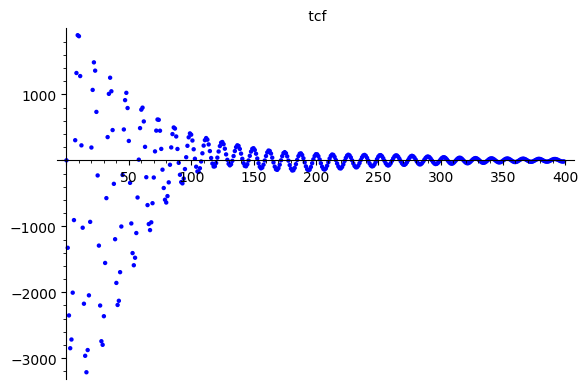

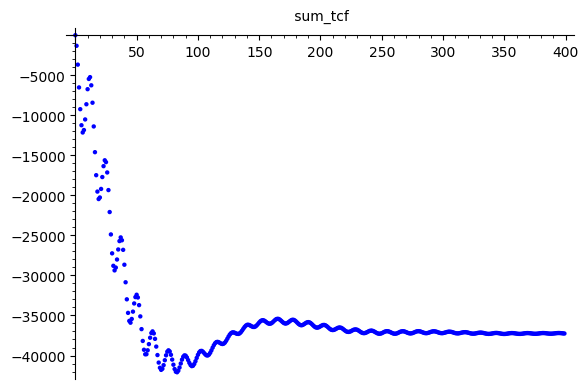

In [24]:
for j in [1]:
    print(tcf_names_g[j])
    for i in [1,3]:
        plt = list_plot(tcf_data_g[j][i][0:-19600])
        plt.show(title=tcf_header_g[i])

Membrane Time correlation functions for (velocity(1.0e+3 m/s), acceleration(1.0e+12 m/s^2))



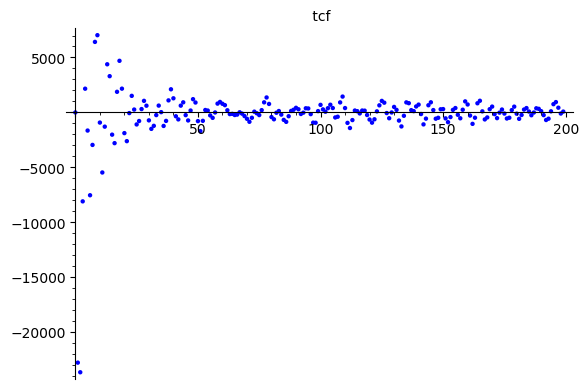

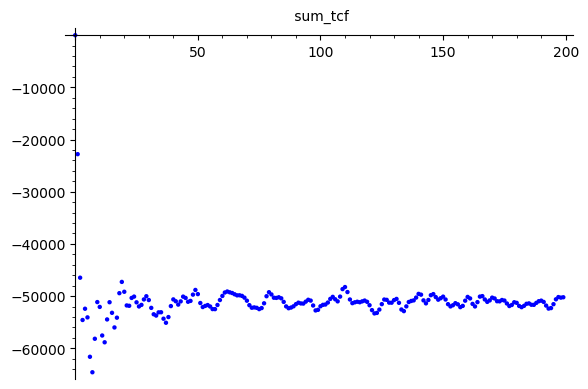

In [25]:
for j in [1]:
    print(tcf_names_m[j])
    for i in [1,3]:
        plt = list_plot(tcf_data_m[j][i][0:-19800])
        plt.show(title=tcf_header_m[i])


$${C^d}_{v_z a_z}\left(t\right) = \left< \frac{\vec{v}_z(0)}{\left|\vec{v}_z(0)\right|} \left(\vec{v}_z(0)\, \vec{a}_z(t)\right)\right>$$

Gas Time correlation functions for (velocity(1.0e+3 m/s), acceleration(1.0e+12 m/s^2))



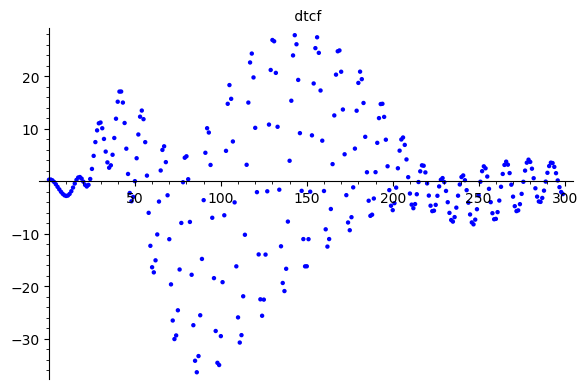

In [26]:
for j in [1]:
    print(tcf_names_g[j])
    for i in [2]:
        plt = list_plot(tcf_data_g[j][i][0:-19700])
        plt.show(title=tcf_header_g[i])


$${\int\limits_{0}^{t} \,{C^d}_{v_z a_z}\left(\tau\right)\,d\tau}$$


Gas Time correlation functions for (velocity(1.0e+3 m/s), acceleration(1.0e+12 m/s^2))



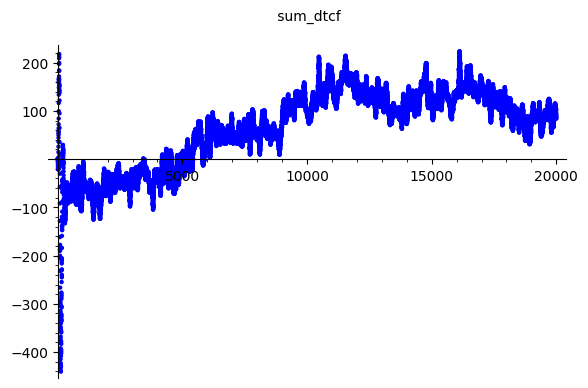

In [27]:
for j in [1]:
    print(tcf_names_g[j])
    for i in [4]:
        plt = list_plot(tcf_data_g[j][i][0:])
        plt.show(title=tcf_header_g[i])

Membrane Time correlation functions for (velocity(1.0e+3 m/s), acceleration(1.0e+12 m/s^2))



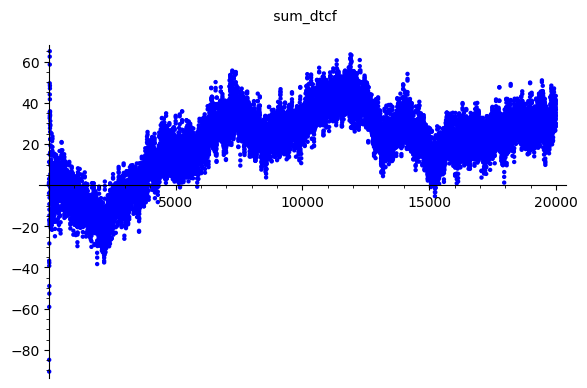

In [28]:
for j in [1]:
    print(tcf_names_m[j])
    for i in [4]:
        plt = list_plot(tcf_data_m[j][i][0:])
        plt.show(title=tcf_header_m[i])

Если предположить, что интегральная сумма для интеграла
$${\int\limits_{0}^{t} \,{C^d}_{v_z a_z}\left(\tau\right)\,d\tau}$$
на графике выше вышла на уровень насыщения на уровне
порядка

In [29]:
import numpy as np
np.mean(tcf_data_g[j][i][-1000:])

89.211097

(для газа)
и порядка

In [30]:
np.mean(tcf_data_m[j][i][-1000:])

30.031904240000003

(для мембраны)
то с учетом коэффициента размерности, который в системе СИ равен

velocity(1.0e+3 m/s) * acceleration(1.0e+12 m/s^2) * time step between traj records 0.004 * 1.0E-12 s

$4 \frac{m^2}{s^2}$


тогда для величины 

$$\overline{V}_z=\sqrt{\int\limits_{0}^{\infty} \,{C^d}_{v_z a_z}\left(t\right)\,dt}$$

$${C^d}_{v_z a_z}\left(t\right) = \left< \frac{\vec{v}_z(0)}{\left|\vec{v}_z(0)\right|} \left(\vec{v}_z(0)\, \vec{a}_z(t)\right)\right>$$

в одномерном случае

In [31]:
velocity_units_of_measurement     = 1.0e+3          # m/s
acceleration_units_of_measurement = 1.0e+12         # m/s^2
time_step_between_traj_records    = 0.004 * 1.0E-12 # s

Cdva_k = velocity_units_of_measurement * acceleration_units_of_measurement * time_step_between_traj_records
Cdva_k

4.00000000000000

In [32]:
latex(np.mean(tcf_data_g[j][i][-1000:]))

89.211097

In [33]:
from IPython.display import display, Math, Latex
display(Math("$$\\overline{V}_z=\\sqrt{ " + str(Cdva_k) + " \\cdot" + \
             latex(np.mean(tcf_data_g[j][i][-1000:])) + \
             "} = " + \
             latex(sqrt(Cdva_k * np.mean(tcf_data_g[j][i][-1000:]))) + "$$"))

<IPython.core.display.Math object>

(для газа)

In [34]:
from IPython.display import display, Math, Latex
display(Math("$$\\overline{V}_z=\\sqrt{ " + str(Cdva_k) + " \\cdot" + \
             latex(np.mean(tcf_data_m[j][i][-1000:])) + \
             "} = " + \
             latex(sqrt(Cdva_k * np.mean(tcf_data_m[j][i][-1000:]))) + "$$"))

<IPython.core.display.Math object>

(для мембраны)

В то время как скорость направленной диффузии газа полученная из результатов длительных расчётов

по формуле для коэффициента $\overline{V}$ направленного самопроизвольного осмоса

$$\lim\limits_{t \to \infty} \left(r(t)-r(0)\right) = \overline{V} \, t$$

V_os, m/s                    = 0.004993395066110951 (для газа)

V_os, m/s                    = -0.0020737865090543262 (для мембраны)

Надо отметить, что отношение этих величин имеет похожие величины

In [35]:
(sqrt(Cdva_k*np.mean(tcf_data_g[j][i][-1000:]))/sqrt(4*np.mean(tcf_data_m[j][i][-1000:])))

1.72352665627766

In [36]:
0.004993395066110951/0.0020737865090543262

2.40786360809532

In [37]:
sqrt(Cdva_k*np.mean(tcf_data_g[j][i][-2000:]))/0.004993395066110951

3715.9101524146267

In [38]:
sqrt(Cdva_k*np.mean(tcf_data_m[j][i][-2000:]))/0.0020737865090543262

5247.3733667370025

gas natoms size = 78

membrane or globule natoms size = 236

In [39]:
78^2

6084

Рассмотрим обычную Cvv time correlation function

$$C_{vv}\left(t\right) = \left< \vec{v}(0)\, \vec{v}(t)\right>$$

$\left[C_{vv}\left(t\right)\right] = \frac{sm^2}{s^2}$

Gas Time correlation functions for (velocity(1.0e+3 m/s), velocity(1.0e+3 m/s))



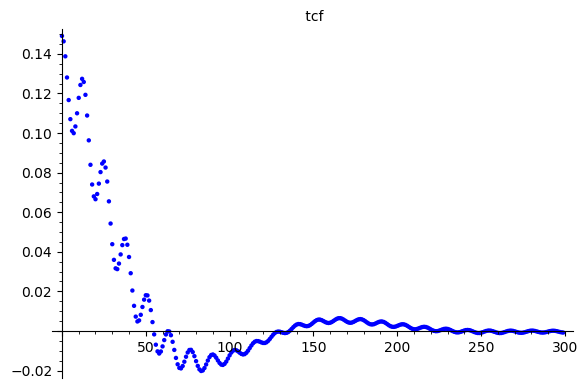

In [40]:
for j in [0]:
    print(tcf_names_g[j])
    for i in [1]:
        plt = list_plot(tcf_data_g[j][i][0:-19700])
        plt.show(title=tcf_header_g[i])

Membrane Time correlation functions for (velocity(1.0e+3 m/s), velocity(1.0e+3 m/s))



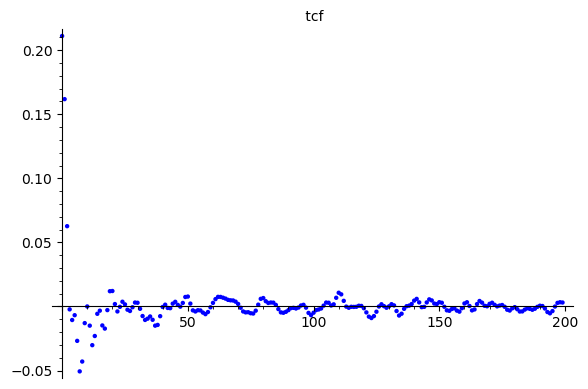

In [41]:
for j in [0]:
    print(tcf_names_m[j])
    for i in [1]:
        plt = list_plot(tcf_data_m[j][i][0:-19800])
        plt.show(title=tcf_header_m[i])

Рассмотрим как ведёт себя интегральная сумма для Cvv time correlation function из которой по формуле Green Kubo

$$D=\frac{1}{3}\int\limits_{0}^{\infty} \,C_{vv}\left(t\right)\,dt$$

получается коэффициент диффузии (классический, не направленный) газа сквозь мембрану. Чтобы получить из данного графика коэффициент диффузии в системе СИ нужно полученную из данного графика интегральную сумму на бесконечности умножить на коэффициент размерности, равный

velocity(1.0e+3 m/s) * velocity(1.0e+3 m/s) * time step between traj records 0.004 * 1.0E-12 s

$4 * 1.0E-9 \frac{m^2}{s}$

Gas Time correlation functions for (velocity(1.0e+3 m/s), velocity(1.0e+3 m/s))



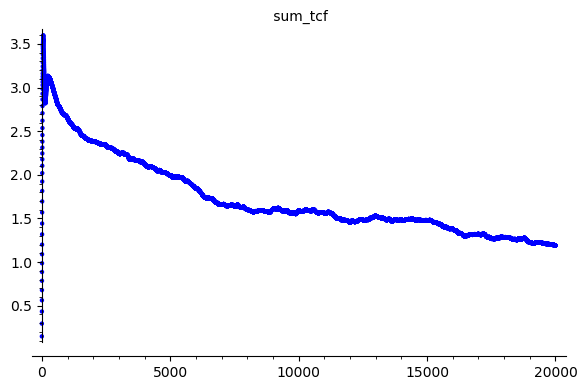

In [42]:
for j in [0]:
    print(tcf_names_g[j])
    for i in [3]:
        plt = list_plot(tcf_data_g[j][i][0:])
        plt.show(title=tcf_header_g[i])

Membrane Time correlation functions for (velocity(1.0e+3 m/s), velocity(1.0e+3 m/s))



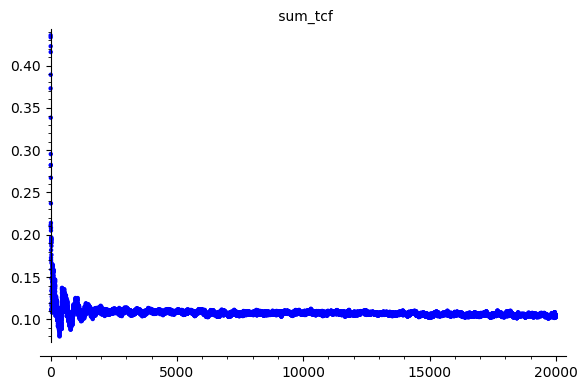

In [43]:
for j in [0]:
    print(tcf_names_m[j])
    for i in [3]:
        plt = list_plot(tcf_data_m[j][i][0:])
        plt.show(title=tcf_header_m[i])

Чтобы удовлетворить соответствию единицам измерения при определении характеристкик направленной диффузии, можно применить другой подход

Считаем 
directed time correlation function
для (velocity, velocity)

$${C^d}_{v_z v_z}\left(t\right) = \left< \frac{\vec{v}_z(0)}{\left|\vec{v}_z(0)\right|} \left(\vec{v}_z(0)\, \vec{v}_z(t)\right)\right>$$


$\left[{C^d}_{vv}\left(t\right)\right] = \frac{sm^2}{s^2}$

Gas Time correlation functions for (velocity(1.0e+3 m/s), velocity(1.0e+3 m/s))



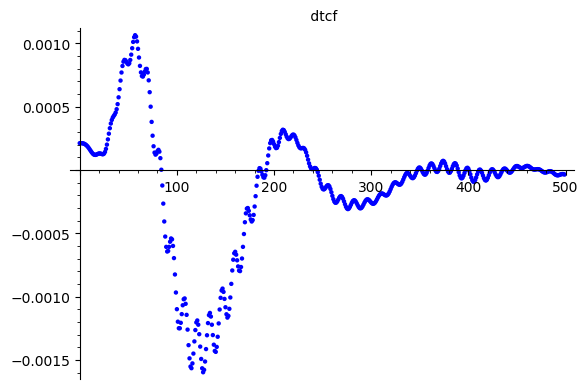

In [44]:
for j in [0]:
    print(tcf_names_g[j])
    for i in [2]:
        plt = list_plot(tcf_data_g[j][i][0:-19500])
        plt.show(title=tcf_header_g[i])

Membrane Time correlation functions for (velocity(1.0e+3 m/s), velocity(1.0e+3 m/s))



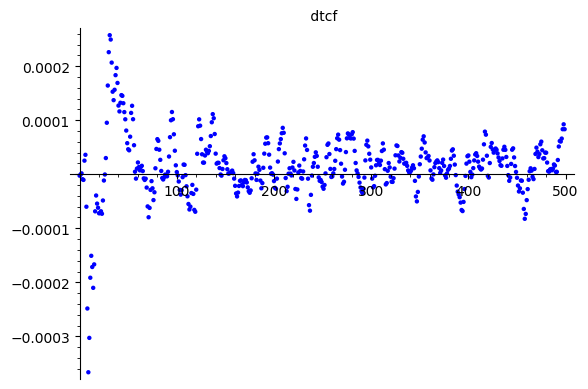

In [45]:
for j in [0]:
    print(tcf_names_m[j])
    for i in [2]:
        plt = list_plot(tcf_data_m[j][i][0:-19500])
        plt.show(title=tcf_header_m[i])

Интегрируем 
directed time correlation function
для (velocity, velocity)

$${D^d}\left(t\right)={\int\limits_{0}^{t} \,{C^d}_{v_z v_z}\left(\tau\right)\,d\tau}$$

$\left[{D^d}\left(t\right)\right] = \frac{sm^2}{s}$

На графике ниже интегральная сумма

Gas Time correlation functions for (velocity(1.0e+3 m/s), velocity(1.0e+3 m/s))



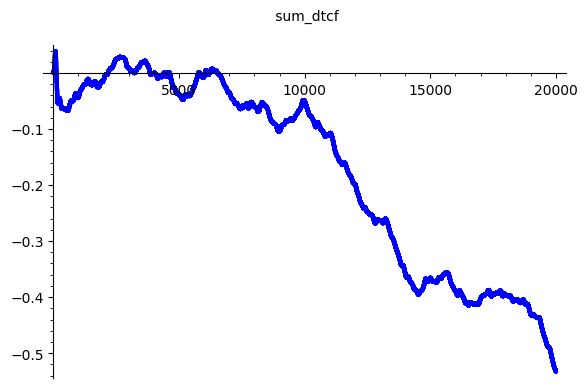

In [46]:
for j in [0]:
    print(tcf_names_g[j])
    for i in [4]:
        plt = list_plot(tcf_data_g[j][i][0:])
        plt.show(title=tcf_header_g[i])

Membrane Time correlation functions for (velocity(1.0e+3 m/s), velocity(1.0e+3 m/s))



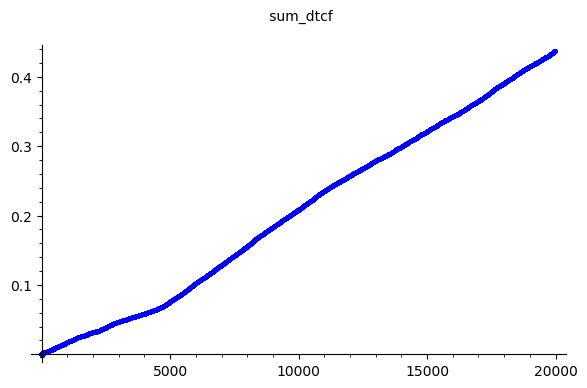

In [47]:
for j in [0]:
    print(tcf_names_m[j])
    for i in [4]:
        plt = list_plot(tcf_data_m[j][i][0:])
        plt.show(title=tcf_header_m[i])

Определяем производную по времени интеграла
directed time correlation function
для (velocity, velocity)

$${\overline{V}_z}^2=\frac{{D^d}\left(t_2\right)-{D^d}\left(t_1\right)}{t_2-t_1}$$

$\left[{\overline{V}_z}^2\right] = \frac{sm^2}{s^2}$

методом линейной интерполяции

In [48]:
def linterp_dtcf_vv(tcf_data, start_from = 0):
    import numpy as np
    y = tcf_data[0][4][start_from:]
    x = tcf_data[0][0][start_from:]

    t = []
    for i in range(len(x)):
        t += [x[i] * time_step_between_traj_records]
    A = np.vstack([t, np.ones(len(x))]).T

    
    dvv = []
    for i in range(len(y)):
        dvv += [y[i] * 1.0e+3 * 1.0e+3]

    m, c = np.linalg.lstsq(A, dvv, rcond=None)[0]
    
    import matplotlib.pyplot as plt
    _ = plt.plot(t, dvv, 'o', label='Original data', markersize=10)
    _ = plt.plot([  t[0],       t[len(x)-1]    ],
                 [m*t[0] + c, m*t[len(x)-1] + c],
                 'r', label='Fitted line')
    _ = plt.legend()
    plt.show()
    
    return m, c

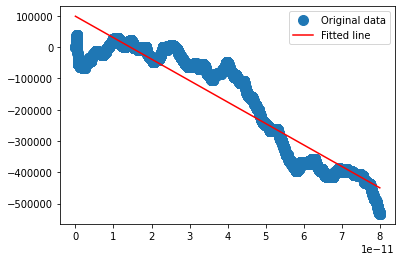

In [49]:
m_g, c_g = linterp_dtcf_vv(tcf_data_g)

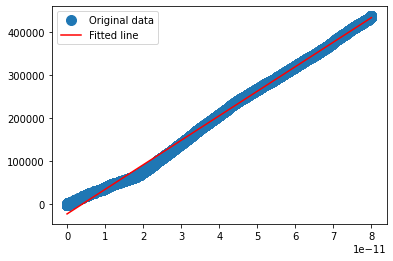

In [50]:
m_m, c_m = linterp_dtcf_vv(tcf_data_m)

In [51]:
m_g/m_m

-1.200958346650921

In [52]:
sqrt(-m_g/m_m)

1.0958824511100271

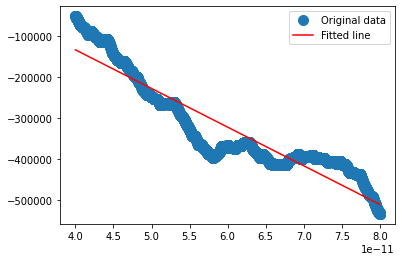

In [53]:
m_g, c_g = linterp_dtcf_vv(tcf_data_g, start_from = 10000)

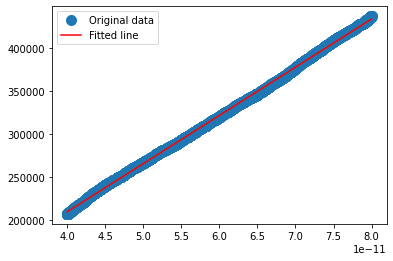

In [54]:
m_m, c_m = linterp_dtcf_vv(tcf_data_m, start_from = 10000)

In [55]:
m_g/m_m

-1.6820520464496869

отношение полученных таким образом характеристик направленного дрейфа

In [56]:
sqrt(-m_g/m_m)

1.2969394922083632

по сравнению с отношением скоростей полученных в результате длительного моделирования

In [57]:
0.004993395066110951/0.0020737865090543262

2.40786360809532

In [58]:
0.004993395066110951/sqrt(-m_g)

5.143581478722432e-11

In [59]:
sqrt(-m_g), sqrt(m_m)

(97080119.88858813, 74853237.54255104)